# Task 1
Genere muestras aleatorias a partir de una distribución de probabilidad discreta personalizada mediante el método de aceptación-rechazo.
1. Defina una distribución de probabilidad discreta objetivo con valores y probabilidades especificados.
    - a. Función = (x**2) / 55
2. Elija una distribución de propuesta con un soporte mayor que cubra el soporte de la distribución de destino.
    - a. N.B: El "soporte" de una variable aleatoria o distribución de probabilidad se refiere al conjunto de valores para los cuales la variable aleatoria tiene una probabilidad distinta de cero. En otras palabras, es el rango de valores donde la distribución de probabilidad es positiva.
3. Calcule la constante C para acotar la relación entre el PMF objetivo y el PMF propuesto.
4. Implemente el método de aceptación-rechazo para generar muestras aleatorias a partir de la distribución discreta personalizada.
5. Genere una muestra aleatoria de tamaño 1000 a partir de la distribución personalizada.
6. Trace un histograma de la muestra generada y compárelo con el PMF objetivo.


C:\Users\aleaz\AppData\Local\Temp\ipykernel_4604\1870042772.py:34: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "ro-" (-> linestyle='-'). The keyword argument will take precedence.
  plt.plot(x_values, target_pmf, 'ro-', label='PMF objetivo', linestyle='-', linewidth=2, marker='o')
C:\Users\aleaz\AppData\Local\Temp\ipykernel_4604\1870042772.py:34: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "ro-" (-> marker='o'). The keyword argument will take precedence.
  plt.plot(x_values, target_pmf, 'ro-', label='PMF objetivo', linestyle='-', linewidth=2, marker='o')


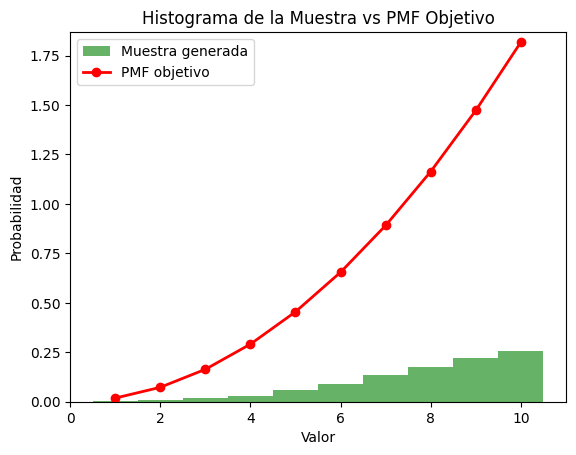

In [54]:
import numpy as np
import matplotlib.pyplot as plt

# 1. Definir la distribución de probabilidad discreta objetivo
x_values = np.arange(1, 11)
target_pmf = (x_values**2) / 55  # La función objetivo

# 2. Elegir una distribución de propuesta (distribución uniforme en este caso)
proposal_pmf = np.ones_like(x_values) / len(x_values)  # Distribución uniforme

# 3. Calcular la constante C
C = max(target_pmf / proposal_pmf)

# 4. Implementar el método de aceptación-rechazo
def acceptance_rejection_sampling(target_pmf, proposal_pmf, C, size=1000):
    samples = []
    while len(samples) < size:
        # Elegir una muestra de la distribución de propuesta
        x = np.random.choice(x_values, p=proposal_pmf)
        # Generar un número aleatorio para la aceptación
        u = np.random.uniform(0, C * proposal_pmf[x - 1])
        # Aceptar o rechazar la muestra
        if u <= target_pmf[x - 1]:
            samples.append(x)
    return np.array(samples)

# 5. Generar una muestra aleatoria de tamaño 1000
sample_size = 1000
samples = acceptance_rejection_sampling(target_pmf, proposal_pmf, C, sample_size)

# 6. Graficar el histograma de la muestra generada y compararlo con el PMF objetivo
counts, bins, _ = plt.hist(samples, bins=np.arange(1, 12) - 0.5, density=True, alpha=0.6, color='g', label='Muestra generada')

plt.plot(x_values, target_pmf, 'ro-', label='PMF objetivo', linestyle='-', linewidth=2, marker='o')
plt.xlabel('Valor')
plt.ylabel('Probabilidad')
plt.ylim(0, max(max(target_pmf), max(counts)) + 0.05)  # Ajuste de los límites del eje y para coincidir con el valor máximo entre ambos
plt.legend()
plt.title('Histograma de la Muestra vs PMF Objetivo')
plt.show()
